# Survival Analysis

## Table of Contents: 
### Preface
### A. Applying KaplanMeierFitter Survival Analysis
### B. Applying CoxPHFitter Survival Analysis 
### C. Applying qq_plot Survival Analysis  

## Preface

## 1. Import necessary libraries:

In [1]:
import os # for the directory 
import csv # reading files
import pandas as pd  # data analysis tools
import numpy as np
from lifelines import CoxPHFitter
from pandas import DataFrame # easier to analysis
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
from lifelines import *
from lifelines.plotting import qq_plot
fname=r"C:\Users\mohab\gdc_download_PhiSci" # locate the location 
os.chdir(r"C:\Users\mohab\gdc_download_PhiSci") # assign the default work folder 
list_names = os.listdir(fname) # to include all files into one list variable

### A. Applying KaplanMeierFitter Survival Analysis

In [11]:
sub_finalTable_hotted_survival = pd.read_csv('sub_finalTable_hotted_survival_dataset.csv')
sub_finalTable_hotted_survival.head()

,Patients,0,1,2,Event_Observed,Time_to_event
0,TCGA-05-4244,1,0,0,False,0.000000
1,TCGA-05-4249,1,0,0,False,31.729167
2,TCGA-05-4250,1,0,0,True,2.520833
3,TCGA-05-4382,1,0,0,False,12.645833
4,TCGA-05-4384,1,0,0,False,8.875000


In [139]:
#!pip install lifelines

In [19]:
sub_finalTable_hotted_survival = sub_finalTable_hotted_survival.dropna()
T = sub_finalTable_hotted_survival['Time_to_event'][sub_finalTable_hotted_survival['Time_to_event'] == 0.0] = 0.00001
T = sub_finalTable_hotted_survival['Time_to_event']
E = sub_finalTable_hotted_survival['Event_Observed']
E = E*1.0

<ipython-input-19-2749e236e279>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T = sub_finalTable_hotted_survival['Time_to_event'][sub_finalTable_hotted_survival['Time_to_event'] == 0.0] = 0.00001


In [20]:
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)  

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 503 total observations, 320 right-censored observations>

In [7]:
kmf.survival_function_

,KM_estimate
timeline,
0.000000,1.000000
0.000010,0.998012
0.083333,0.996012
0.229167,0.996012
0.270833,0.996012
...,...
103.354167,0.207731
104.000000,0.207731
140.250000,0.207731


In [160]:
kmf.cumulative_density_

,KM_estimate
timeline,
0.000000,0.000000
0.000010,0.001988
0.083333,0.003988
0.229167,0.003988
0.270833,0.003988
...,...
103.354167,0.792269
104.000000,0.792269
140.250000,0.792269


<AxesSubplot:xlabel='timeline'>

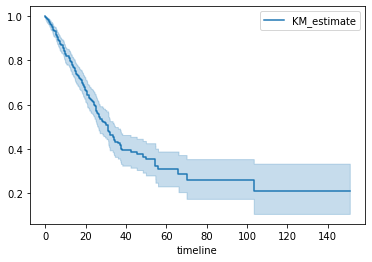

In [8]:
kmf.plot_survival_function()

### B. Applying CoxPHFitter Survival Analysis

<AxesSubplot:>

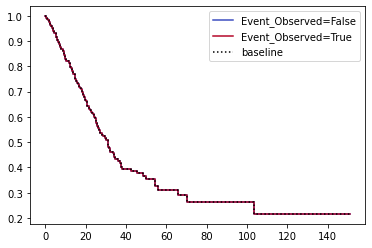

In [9]:
cph = CoxPHFitter()
cph.fit(sub_finalTable_hotted_survival.iloc[:,[4,5]], duration_col='Time_to_event', event_col='Event_Observed')
cph.plot_partial_effects_on_outcome(covariates='Event_Observed', values=[False, True], cmap='coolwarm')

### C. Applying qq_plot Survival Analysis  

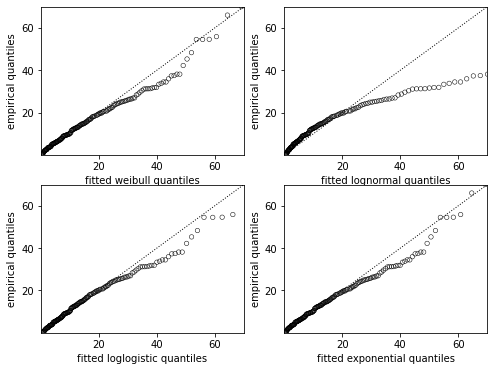

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.reshape(4,)
for i, model in enumerate([WeibullFitter(), LogNormalFitter(), LogLogisticFitter(), ExponentialFitter()]):
    model.fit(T, E)
    qq_plot(model, ax=axes[i])